### Imports and Settings

In [1]:
import auxiliaries as aux

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
species = 'Deer'
file_name = 'GSM02927'

### Future-Predicted Models

In [3]:
future_window = aux.FuturePredictionWindow(species, file_name)
future_train_df = future_window.train_df
future_test_df = future_window.test_df

#### Correlations Between Inputs and Outputs in Training Set

,external-temperature,month,day
longitude,0.445072,0.433269,-0.061711
latitude,-0.077387,0.306596,0.085770


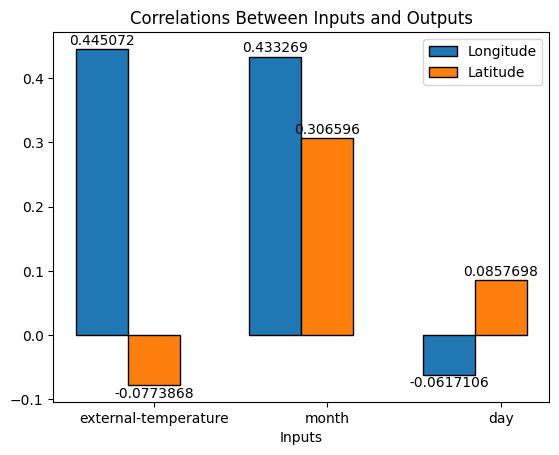

In [4]:
def covariance_of_deer(train_df):
    # Retrieve deer data
    deer_df = train_df.copy(deep=True)

    # Normalize deer data
    deer_df = (deer_df - deer_df.mean()) / deer_df.std()

    # Generate Correlation Matrix and Simplify
    corr_matrix = deer_df.corr()
    corr_matrix.drop(labels=['month', 'day', 'external-temperature'], inplace=True)
    corr_matrix.drop(columns=['longitude', 'latitude'], inplace=True)

    # Create Bar Graphs
    con = plt.bar(x = np.arange(len(corr_matrix.columns)) - 0.3, height=corr_matrix.loc['longitude'], width=0.3, edgecolor='black', label='Longitude')
    plt.bar_label(container=con, padding=1)

    con = plt.bar(x = np.arange(len(corr_matrix.columns)), height=corr_matrix.loc['latitude'], width=0.3, edgecolor='black', label='Latitude')
    plt.bar_label(container=con, padding=1)

    plt.title(f'Correlations Between Inputs and Outputs')
    plt.xticks(ticks = np.arange(len(corr_matrix.columns)), labels = corr_matrix.columns)
    plt.xlabel("Inputs")
    plt.legend()

    return corr_matrix

covariance_of_deer(future_train_df)

#### Distributions of Months

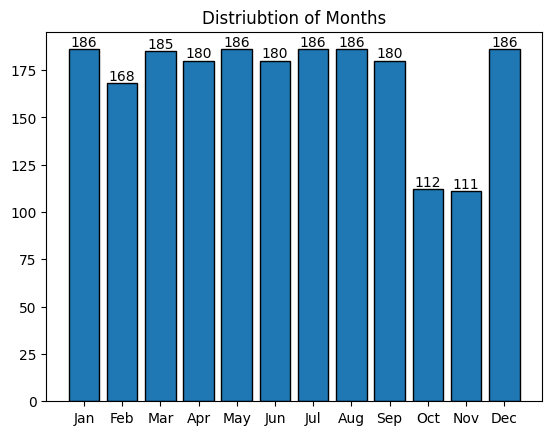

In [5]:
def month_distribution(train_df):
    # Data
    month_distribution = train_df['month'].value_counts().sort_index()

    # Graph Data
    con = plt.bar(month_distribution.index, month_distribution.values, edgecolor='black')
    plt.bar_label(container=con)

    # Clean Graph
    plt.title("Distriubtion of Months")
    plt.xticks(np.arange(1, 13), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

month_distribution(future_train_df)

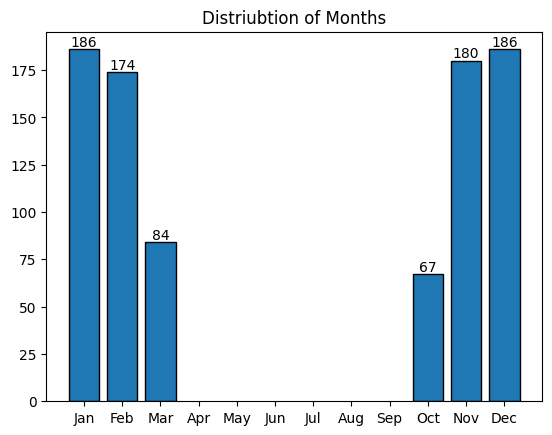

In [6]:
month_distribution(future_test_df)

#### Mapping of Testing and Training Data

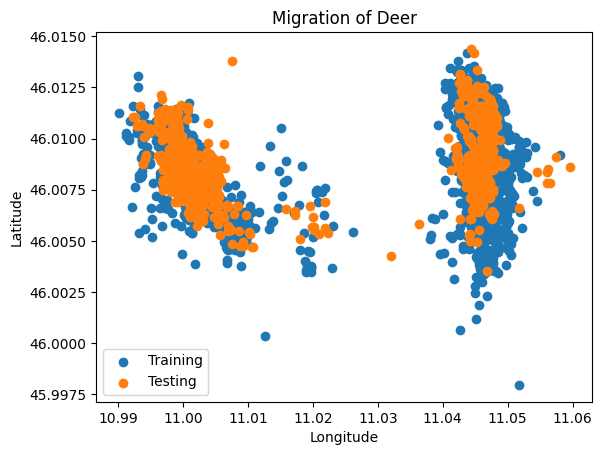

In [7]:
def map_plot(train_df, test_df):
    plt.scatter(train_df['longitude'] , train_df['latitude'], label='Training')
    plt.scatter(test_df['longitude'] , test_df['latitude'], label='Testing')
    plt.title("Migration of Deer")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.legend(loc='best')
    plt.plot()
map_plot(future_train_df, future_test_df)